# Test Notebook to learn how to read in GPS

### Some sources of GPS data

Greenland

http://go-gnet.org/data/

https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html

____

### Load in some modules

In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tidegauge_functions import read_GPS_SONEL
from tidegauge_functions import calc_rolling_decomposition_GPS
%matplotlib inline

### Specify directories and filenames
and other runtime options

In [30]:
dir_in = 'data'
sub_dir = 'GPS'
file_in = 'dAB50_99999X007_ULR6B.neu'
ext = '.csv'

In [31]:
filepath = os.path.join(dir_in, sub_dir, file_in)

### Basic `read_csv` to peek into the csv file

In [32]:
df = read_GPS_SONEL(filepath)
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD
Year,,,,,,
2005-08-18,-0.0161,-0.0179,0.0317,0.0036,0.0034,0.0094
2005-08-19,-0.0175,-0.0166,0.0348,0.0036,0.0031,0.0097
2005-08-20,-0.0153,-0.0154,0.0216,0.0031,0.0029,0.0078
2005-08-21,-0.0152,-0.0123,0.0227,0.0031,0.0028,0.0076
2005-08-22,-0.0146,-0.0172,0.0214,0.0032,0.0029,0.0078
...,...,...,...,...,...,...
2013-12-26,-0.1427,-0.1194,0.1713,0.0034,0.0031,0.0074
2013-12-27,-0.1426,-0.1229,0.1572,0.0029,0.0025,0.0070
2013-12-28,-0.1409,-0.1193,0.1563,0.0031,0.0026,0.0078


In [36]:
df = calc_rolling_decomposition_GPS(df)
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD,trend_Vert,seasonal_Vert,residual_Vert,trend_North,seasonal_North,residual_North,trend_East,seasonal_East,residual_East
Year,,,,,,,,,,,,,,,
2005-08-18,-0.0161,-0.0179,0.0317,0.0036,0.0034,0.0094,NaN,0.002307,NaN,NaN,-0.000895,NaN,NaN,-0.000262,NaN
2005-08-19,-0.0175,-0.0166,0.0348,0.0036,0.0031,0.0097,NaN,0.001206,NaN,NaN,-0.002008,NaN,NaN,-0.000580,NaN
2005-08-20,-0.0153,-0.0154,0.0216,0.0031,0.0029,0.0078,NaN,0.004195,NaN,NaN,-0.000321,NaN,NaN,0.000402,NaN
2005-08-21,-0.0152,-0.0123,0.0227,0.0031,0.0028,0.0076,NaN,0.002155,NaN,NaN,-0.002035,NaN,NaN,0.000883,NaN
2005-08-22,-0.0146,-0.0172,0.0214,0.0032,0.0029,0.0078,NaN,0.003982,NaN,NaN,-0.001705,NaN,NaN,-0.000193,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-26,-0.1427,-0.1194,0.1713,0.0034,0.0031,0.0074,NaN,0.000387,NaN,NaN,-0.000456,NaN,NaN,-0.000225,NaN
2013-12-27,-0.1426,-0.1229,0.1572,0.0029,0.0025,0.0070,NaN,0.001967,NaN,NaN,0.000016,NaN,NaN,0.000269,NaN
2013-12-28,-0.1409,-0.1193,0.1563,0.0031,0.0026,0.0078,NaN,0.000732,NaN,NaN,-0.000112,NaN,NaN,-0.000392,NaN


In [ ]:
# with open(filepath) as myfile:
#     firstNlines=myfile.readlines()[0:5] #put here the interval you want
    
# print(firstNlines)

#with open(filepath) as myfile:
   # head = [next(myfile) for x in range(13)]
#print(head)

In [40]:
res = test_calc_OLS(df, 'DU')
sonel_trend_array[f] = res.params.x1
    
print(f"Trend = {sonel_trend_array[f] * 1000:.2f} mm/yr")
        
#print(res.summary())

fig, ax = plt.subplots(1, 1, figsize=(12,6));
ax.plot(df['DU'].dropna().index, df['DU'].dropna().values, label='trend')
ax.plot(df['DU'].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df['DU'].dropna()))])
# ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
# ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
# ax[1].hlines(0, 0, len(res.resid), color='k');
ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
# ax[1].set_title("Residuals");
plt.suptitle(f"{filepath[-21:4]}")
# plt.savefig(f'figs/test_GPS_OLS_{file_in[:4]}.png')

NameError: name 'test_calc_OLS' is not defined

### Rolling Average

KeyError: 'rolling_mean_year_North'

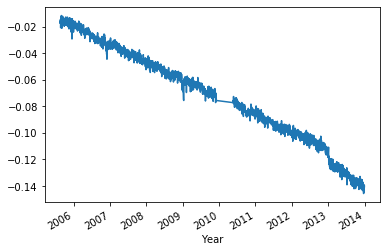

In [37]:
df['North'].plot()
df['rolling_mean_year_North'].plot()
df['rolling_mean_month_North'].plot()
plt.title('North')
plt.legend()
plt.show()

df['East'].plot()
df['rolling_mean_year_East'].plot()
df['rolling_mean_month_East'].plot()
plt.title('East')
plt.legend()
plt.show()

df['Vertical'].plot()
df['rolling_mean_year_Vert'].plot()
df['rolling_mean_month_Vert'].plot()
plt.title('Vertical')
plt.legend()
plt.show()


### Detrended

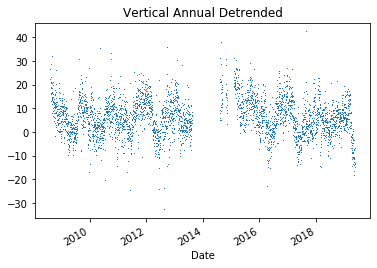

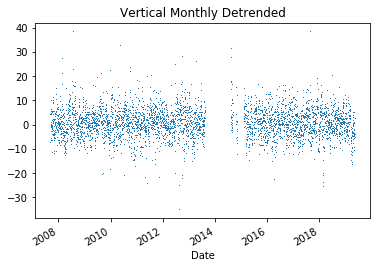

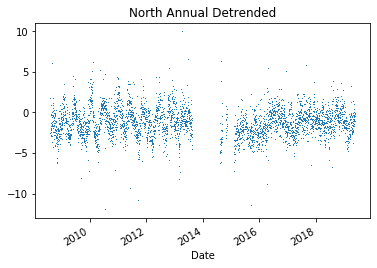

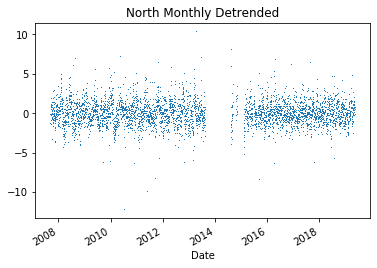

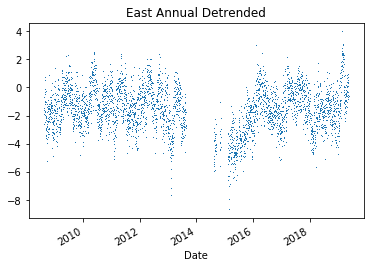

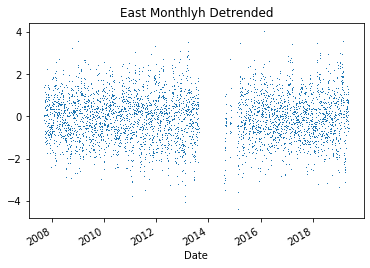

In [22]:
df.ADT_mean_Vert.plot(linestyle='', marker=',')
plt.title('Vertical Annual Detrended')
plt.show()

df.MDT_mean_Vert.plot(linestyle='', marker=',')
plt.title('Vertical Monthly Detrended')
plt.show()

df.ADT_mean_North.plot(linestyle='', marker=',')
plt.title('North Annual Detrended')
plt.show()

df.MDT_mean_North.plot(linestyle='', marker=',')
plt.title('North Monthly Detrended')
plt.show()

df.ADT_mean_East.plot(linestyle='', marker=',')
plt.title('East Annual Detrended')
plt.show()

df.MDT_mean_East.plot(linestyle='', marker=',')
plt.title('East Monthlyh Detrended')
plt.show()

In [ ]:
df[['North', 'East', 'Vertical']].plot(linestyle='', marker=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBF2290308>],
      dtype=object)

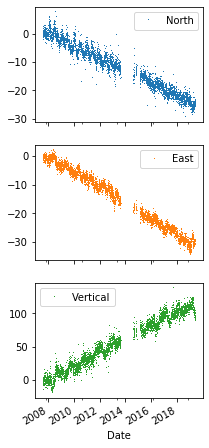

In [12]:
df[['North', 'East', 'Vertical']].plot(subplots=True, 
                                       layout=(3, 1), figsize=(3, 8), 
                                       linestyle='', marker=',',
                                       sharex=True)

In [ ]:
df[['North', 'East', 'Vertical']].plot.hist(alpha=0.5, bins=30)

In [ ]:
df.plot.hexbin(x='East', y='North', C='Vertical')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.tight_layout()

In [ ]:
df.index[-1] - df.index[0]

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df[['Vertical']])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df[['Vertical']], lags = 500)

In [ ]:
df[['North', 'East', 'Vertical']].corr()